In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("7817_1.csv")
print(df.head())


Saving 7817_1.csv to 7817_1.csv
                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindle

In [5]:
columns_needed = [
    'id', 'asins', 'brand', 'categories', 'dateAdded',
    'reviews.rating', 'reviews.text', 'reviews.title',
    'reviews.username'
]

df_clean = df[columns_needed]
df_clean

,id,asins,brand,categories,dateAdded,reviews.rating,reviews.text,reviews.title,reviews.username
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic
...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,3.0,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,1.0,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,1.0,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,3.0,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley


In [7]:
df_clean.columns = [
    'review_id', 'asin', 'brand', 'category', 'date_added',
    'rating', 'review_text', 'review_title', 'username'
]
df_clean

,review_id,asin,brand,category,date_added,rating,review_text,review_title,username
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic
...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,3.0,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,1.0,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,1.0,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02T14:40:43Z,3.0,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley


In [8]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

<ipython-input-8-03027eaf91f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')


In [9]:
df_clean.dropna(subset=['review_text'], inplace=True)

<ipython-input-9-b05af3e678d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(subset=['review_text'], inplace=True)


In [10]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

In [11]:
df_clean['sentiment'] = df_clean['review_text'].apply(get_sentiment)

<ipython-input-11-58454115324c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentiment'] = df_clean['review_text'].apply(get_sentiment)


In [12]:
df_clean.to_csv("amazon_reviews_cleaned.csv", index=False)
print(df_clean.head())

              review_id        asin   brand                    category  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

                 date_added  rating  \
0 2016-03-08 20:21:53+00:00     5.0   
1 2016-03-08 20:21:53+00:00     5.0   
2 2016-03-08 20:21:53+00:00     4.0   
3 2016-03-08 20:21:53+00:00     5.0   
4 2016-03-08 20:21:53+00:00     5.0   

                                         review_text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't

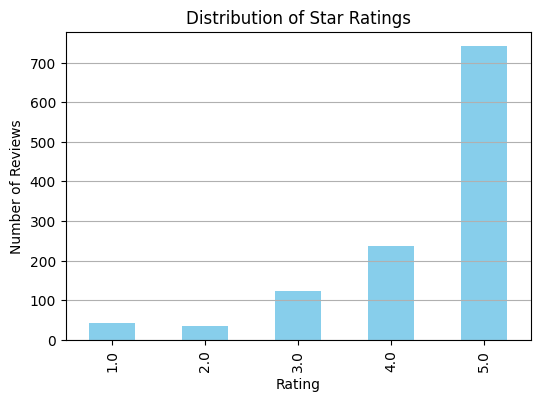

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df_clean['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Star Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.grid(True, axis='y')
plt.show()

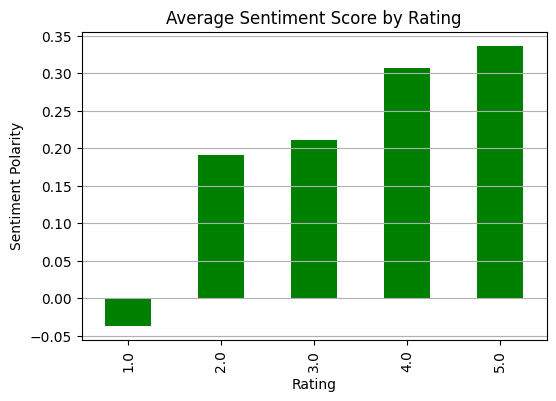

In [14]:
plt.figure(figsize=(6,4))
df_clean.groupby('rating')['sentiment'].mean().plot(kind='bar', color='green')
plt.title('Average Sentiment Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.grid(True, axis='y')
plt.show()

<ipython-input-15-44ade211db62>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_clean.set_index('date_added').resample('M').size().plot(figsize=(10,4))


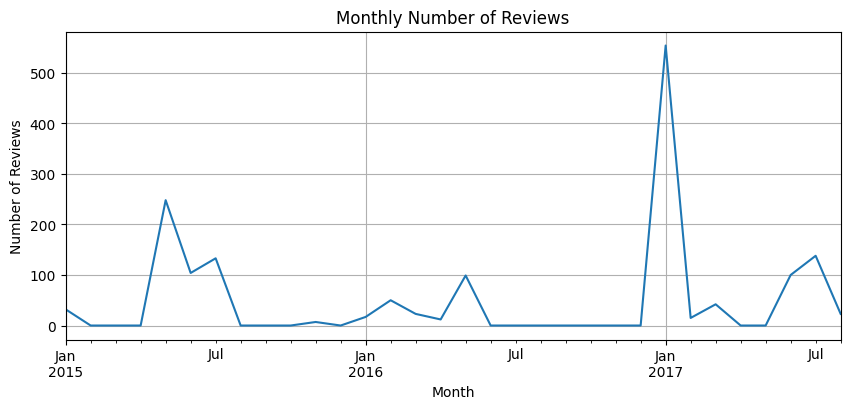

In [15]:
df_clean.set_index('date_added').resample('M').size().plot(figsize=(10,4))
plt.title('Monthly Number of Reviews')
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.grid(True)
plt.show()